# Eigenkreisfrequenz mittels Rayleigh-Quotient {#sec-rayleigh}

[Aufgabenstellung](calculations/%C3%9Cbung1_Rayleigh.pdf)

## Einfacher Balken mit konstanter Masse


![Statisches System](pictures/RL_1.jpg){#fig-system}



In [1]:
import sympy as sp 
import numpy as np
from sympycalcs import render, convert
import sympy.physics.units as unit

import matplotlib.pyplot as plt

## Analytische Formfunktion

Als Formfunktion wird eine Sinus-Funktion gewählt. Dabei ist sicherzustellen, dass die Formfunktion normiert ist. Das heisst, der maximale Wert der Funktion ist $1$. Dazu sind die kinematischen Randbedingungen einzuhalten. Entsprechend des Systems in @fig-system muss die Verformung bei den Lagern $0$ sein. Die gewählte Formfunktion bedingt keine weitere Anpassung zur Normierung.

In [2]:
x,l = sp.symbols('x l', positive=True)

psi_x = sp.sin(sp.pi*x/l)

render.eq_display('Psi(x)',psi_x)

Eq(Psi(x), sin(pi*x/l))

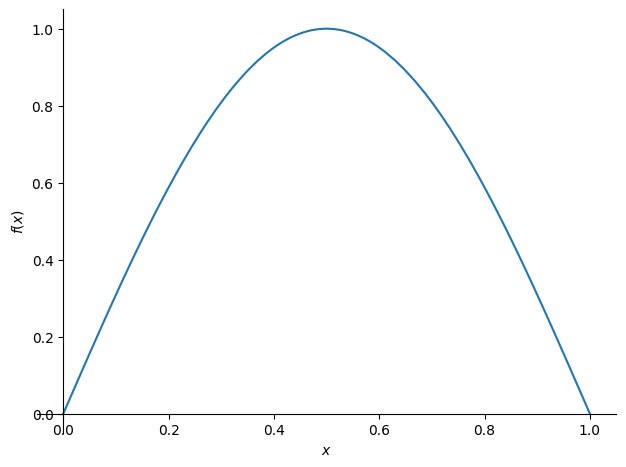

In [3]:
#| label: fig-formfunktion
#| fig-cap: "Analytische Formfunktion"


sp.plot(psi_x.subs(l,1),(x,0,1))
plt.show()

### Rayleigh - Quotient

Der Rayleigh-Quotient ist eine Energiebetrachtung. Er setzt die potentielle, maximale Energie $E_{pot,max}$ zur kinetischen, maximalen Energie $E_{kin,max}$ ins Verhältnis. Daraus lässt sich die Kreisfrequenz $\omega_n$ herauslösen.
$$E_{pot,max} = E_{kin,max}$$

$$\omega_1^2 = \frac{\int_0^L EI[u''(x)]^2 dx}{\int_0^L m_{const.}[u(x)]^2 dx}$$

Dies lässt sich mit entsprechender Formfunktion schreiben:

$$\omega_1^2 = \frac{\int_0^L EI[\Psi''(x)]^2 dx}{\int_0^L m_{const.}[\Psi(x)]^2 dx}$$


In [4]:
E, I, m_const = sp.symbols('E I m_const',real=True)
omega_1 = sp.sqrt(sp.integrate(E*I*sp.diff(psi_x,x,2)**2, (x,0,l)) /sp.integrate(m_const*psi_x**2, (x,0,l)) )


render.eq_display('omega_1', omega_1.doit())

Eq(omega_1, pi**2*sqrt(E*I/m_const)/l**2)

Dies entspricht der exakten Lösung! Da die Formfunktion mit Biegelinie übereinstimmt.

## Formfunktion aus Biegelinie

In [5]:
a, b,F = sp.symbols('a b F')

b = l/2
a = b


zeta = x/l
beta = b/l
alpha = a/l

w_x_biegelinie_1 = (F*l**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)))/(E*I)
w_x_biegelinie_2 = sp.simplify((F*l**3 / 6 *(beta * zeta*(-zeta**2-beta**2+1)+(zeta-alpha)**3)))/(E*I)

w_x_biegelinie = sp.Piecewise((w_x_biegelinie_1,x<=a), (w_x_biegelinie_2,x>a))
w_x_biegelinie



Piecewise((F*l**2*x*(3/4 - x**2/l**2)/(12*E*I), x <= l/2), (F*(x*(3*l**2 - 4*x**2) - (l - 2*x)**3)/(48*E*I), True))

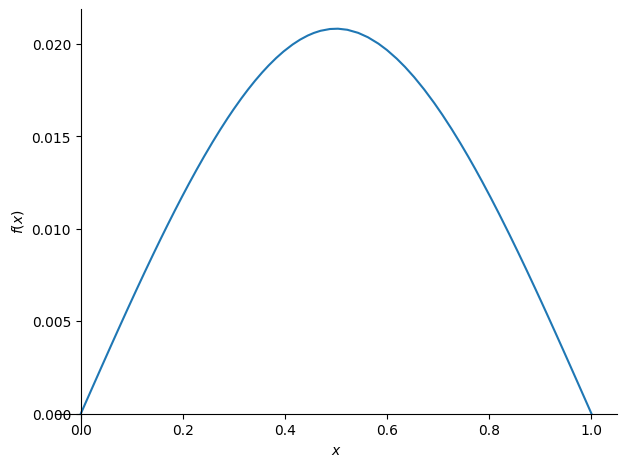

In [6]:
#| label: fig-formfunktion_biege
#| fig-cap: "Formfunktion aus Biegelinie abgeleitet"

sp.plot(w_x_biegelinie.subs([(l,1),(F,1),(E,1),(I,1)]), (x,0,1))
plt.show()

### Normierung
Es ist ersichtlich, dass die Formfunktion noch eine Normierung benötigt.
Dazu wird der Maximalwert zu $1$ gesetzt. Die Randbedingungen sind bereits erfüllt.

In [ ]:
w_x_biegelinie_norm = w_x_biegelinie * w_x_biegelinie.subs(x,l/2)**-1

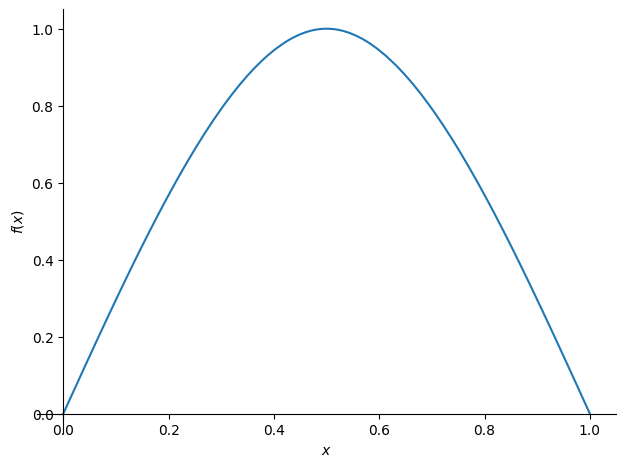

In [ ]:
#| label: fig-formfunktion_biege_norm
#| fig-cap: "Formfunktion aus Biegelinie normiert"

sp.plot(w_x_biegelinie_norm.subs([(l,1),(F,1),(E,1),(I,1)]), (x,0,1))
plt.show()

### Rayleigh - Quotient


In [ ]:
omega_1_biege = sp.sqrt(sp.integrate(E*I*sp.diff(w_x_biegelinie_norm,x,2)**2, (x,0,l)) /sp.integrate(m_const*w_x_biegelinie_norm**2, (x,0,l)) )


render.eq_display('omega_1_biege', omega_1_biege.evalf(3))

Eq(omega_1_biege, 9.94*(E*I/m_const)**0.5/l**2)

Die Abweichung zur exakten Lösung ist minimal.

## Vergleich beider Lösungen

In [ ]:

render.eq_display('Abweichung', ((omega_1_biege / omega_1-1)*100).evalf(2)*unit.percent)

Eq(Abweichung, 0.72*percent)

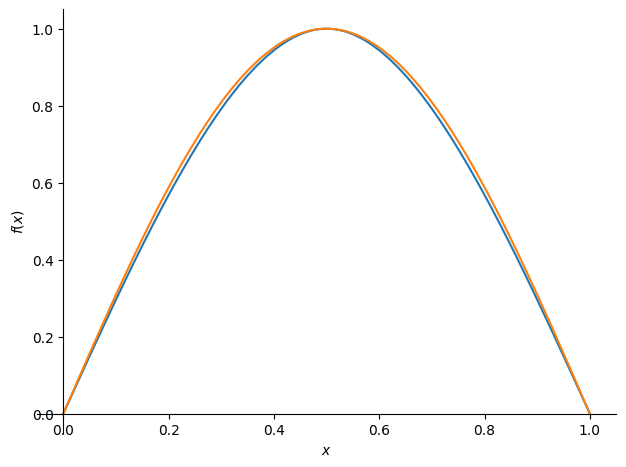

In [ ]:
#| label: fig-formfunktion_vergleich
#| fig-cap: "Überlagerung beider Funktionen"

sp.plot(w_x_biegelinie_norm.subs([(l,1),(F,1),(E,1),(I,1)]),psi_x.subs(l,1), (x,0,1))
plt.show()